# Chapter 10 - Demand Forecasting Dataset (Prophet):

In [62]:
import pandas as pd
import numpy as np

import plotly.express as px
from prophet import Prophet


In [63]:
df = pd.read_csv("dataset_demand_forecasting_sd.csv")

In [64]:
df.shape

(2547, 2)

In [65]:
df.head()

,Date,Sales
0,2014-01-01,11219
1,2014-01-02,12745
2,2014-01-03,10498
3,2014-01-04,12028
4,2014-01-05,13900


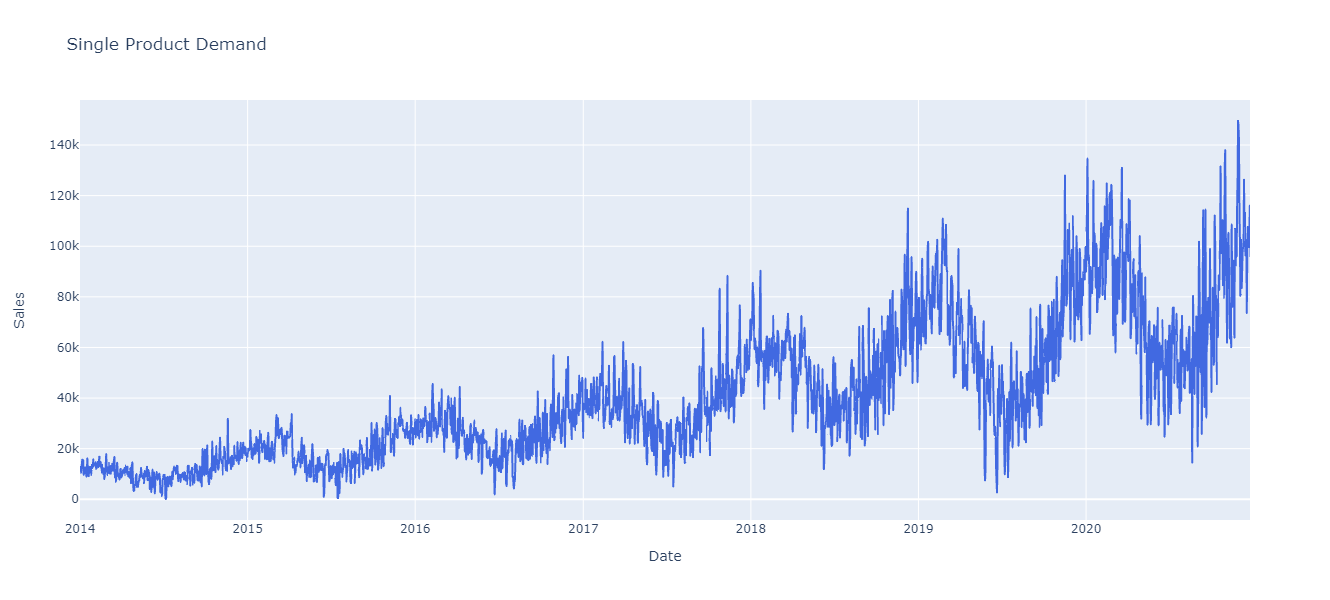

In [66]:
fig = px.line(df, x="Date", y="Sales", title='Single Product Demand', width=800, height=600)
fig.update_traces(line_color='#4169E1')
fig.show()

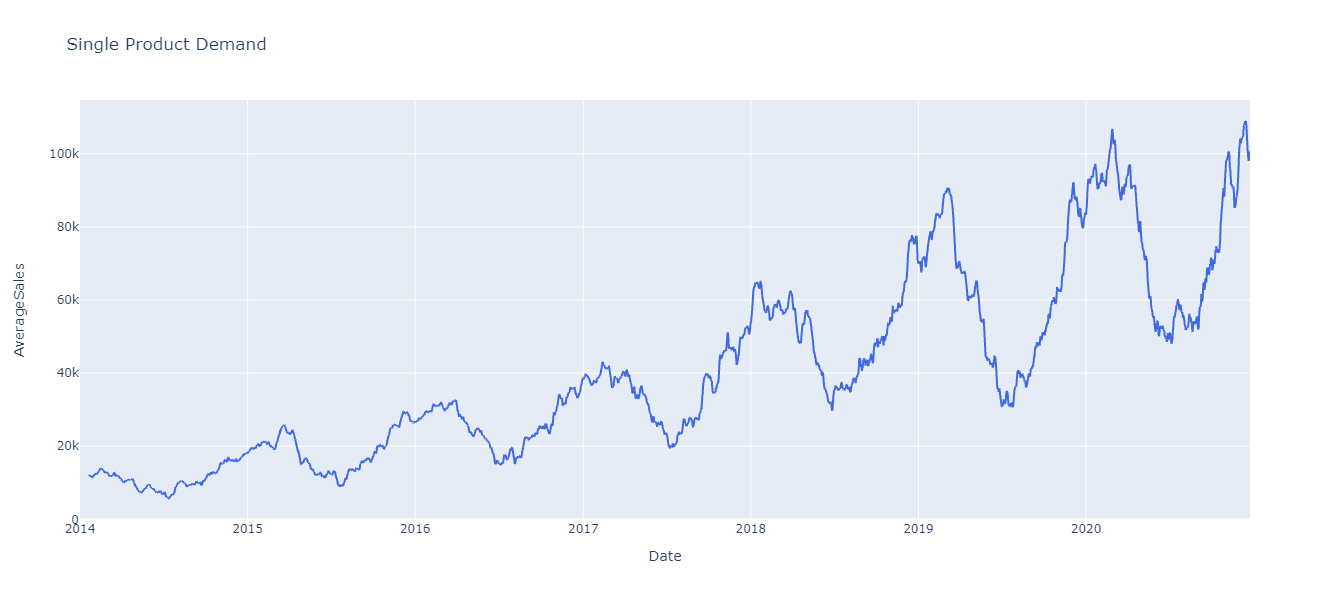

In [67]:
df["AverageSales"] = df["Sales"].rolling(window=20).mean()
fig = px.line(df, x="Date", y="AverageSales", title='Single Product Demand', width=800, height=600, labels="Raw")
fig.update_traces(line_color='#4169E1')
fig.show()

In [140]:
df2 = df[["Date", "AverageSales"]]
df2 = df2.dropna()
df2.columns = ["ds", "y"]

In [141]:
df2.head()

,ds,y
19,2014-01-20,11956.60
20,2014-01-21,12030.30
21,2014-01-22,11959.45
22,2014-01-23,11958.55
23,2014-01-24,11994.70


### Prophet:

In [142]:
m = Prophet()
m.fit(df2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [143]:
future = m.make_future_dataframe(periods=365*2)
future.tail()

,ds
3253,2022-12-19
3254,2022-12-20
3255,2022-12-21
3256,2022-12-22
3257,2022-12-23


In [144]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3253,2022-12-19,135619.081957,55539.042833,227464.544563
3254,2022-12-20,135552.459718,51953.000049,226970.337747
3255,2022-12-21,135454.857473,53709.132605,225785.445302
3256,2022-12-22,135273.617248,53510.119171,225255.686796
3257,2022-12-23,135170.244729,54029.500024,224994.934258


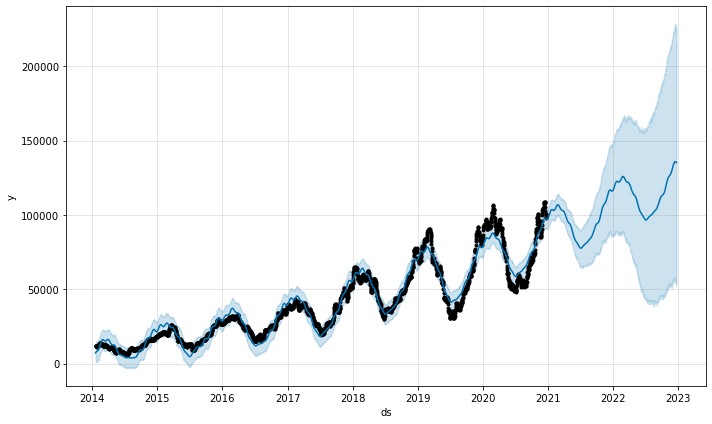

In [145]:
fig1 = m.plot(forecast)

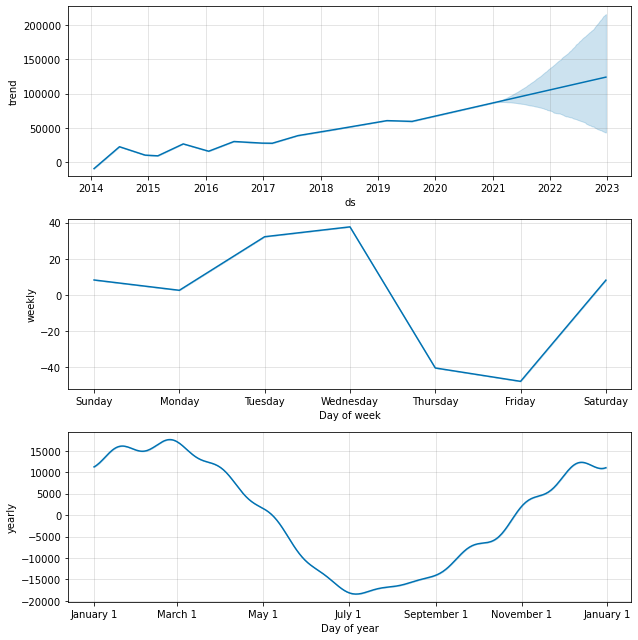

In [146]:
fig2 = m.plot_components(forecast)

### Prophet Test:

In [147]:
df_x = df2[df2["ds"]< '2018-01-01']
df_x.tail()

,ds,y
1455,2017-12-27,51843.35
1456,2017-12-28,50591.35
1457,2017-12-29,50726.65
1458,2017-12-30,51615.50
1459,2017-12-31,53127.65


In [215]:
m = Prophet()
m.fit(df_x)
future = m.make_future_dataframe(periods=365*3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [216]:
forecast = m.predict(future)
forecast["ds"] = pd.to_datetime(forecast["ds"])
forecast[['ds', 'yhat']].tail()

,ds,yhat
2531,2020-12-26,98589.075201
2532,2020-12-27,98635.626849
2533,2020-12-28,98707.262623
2534,2020-12-29,98763.968199
2535,2020-12-30,98816.766279


In [217]:
df_y = df2[df2["ds"]> '2018-01-01']
df_y["ds"] = pd.to_datetime(df_y["ds"])
df_y.tail()

<ipython-input-217-3d073c40be7b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
2542,2020-12-19,98910.15
2543,2020-12-20,98268.45
2544,2020-12-21,98101.00
2545,2020-12-22,99879.40
2546,2020-12-23,100624.25


In [218]:
df_merged = pd.merge(forecast[['ds', 'yhat']], df_y, on="ds", how="inner")
df_merged.shape

(1086, 3)

In [219]:
df_merged

,ds,yhat,y
0,2018-01-02,50772.945147,54795.80
1,2018-01-03,50832.754915,56178.75
2,2018-01-04,50872.689426,57525.10
3,2018-01-05,50951.714079,59692.00
4,2018-01-06,51053.232854,61500.30
...,...,...,...
1081,2020-12-19,97975.893327,98910.15
1082,2020-12-20,98073.684931,98268.45
1083,2020-12-21,98190.212845,98101.00
1084,2020-12-22,98284.669819,99879.40


In [236]:
import plotly.graph_objects as go

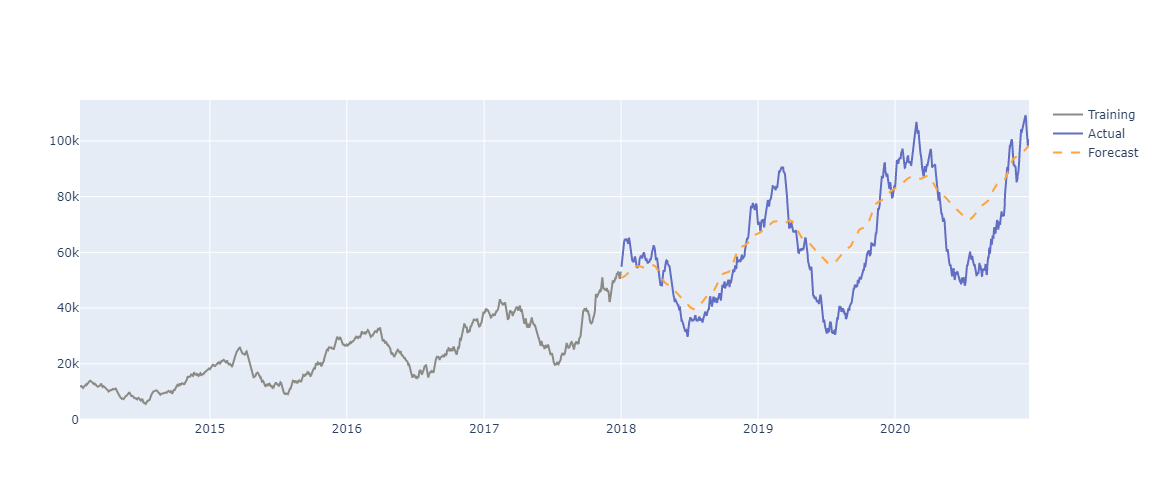

In [242]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_x["ds"], y=df_x["y"], mode='lines', name='Training', line=dict(color="#8c8a84")))
fig.add_trace(go.Scatter(x=df_y["ds"], y=df_y["y"], mode='lines', name='Actual', line=dict(color="#616ec2")))
fig.add_trace(go.Scatter(x=df_merged["ds"], y=df_merged["yhat"], mode='lines', name='Forecast', line=dict(color="#ffa33b",dash="dash")))
fig.update_layout(width=800, height=500)